# NRZ-L Encoding and NRZ-I Encoding

NRZ-L Encoding is a line encoding technique, specifically a serializer line code used to send information bitwise. Conventionally, 1 is represented by one physical level -1, while 0 is represented by another level 1.

In bipolar NRZL encoding, the signal essentially swings from one level to another.

NRZ-I Encoding is another serializer line encoding technique, used to send information bitwise.

The two-level NRZI signal distinguishes data bits by the presence or absence of a transition, meaning that a 1 is represented by a transition from the previous encoded bit, while 0 is represented by no transition.

NRZ-I encoding is used in USBs, but the opposite convention i.e. "change on 0" is used for encoding.

### A-1 : Take input as bit sequence of n-bits, plot its NRZ-L and NRZ-I line coding.
###           Keep time axis resolution in milli-seconds.

Enter the bit sequence101010111010


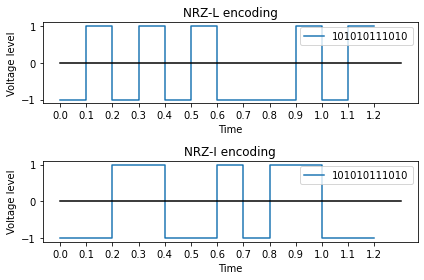

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random


bit_data=input("Enter the bit sequence")
#we are creating two different plots for two graphs
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
x=[]
nrzl=[]
nrzi=[]
x_val=0
#we are generating values for nrzl and nrzi
for it in range(len(bit_data)):
    if int(bit_data[it])==0:
        if len(nrzi) == 0:
            val=1
        else:
            val=nrzi[-1]
        for _ in range(8):
            x+=[round(random.uniform(x_val,x_val+0.1),4)]
            nrzl+=[1]
            nrzi+=[val]
        x+=[x_val,x_val+0.1]
        nrzl+=[1,1]
        nrzi+=[val,val]
        x_val+=0.1
    else:
        if len(nrzi)==0:
            val=-1
        else:
            val=-nrzi[-1]
        for _ in range(8):
            x += [round(random.uniform(x_val, x_val + 0.1),4)]
            nrzl += [-1]
            nrzi+=[val]
        x+=[x_val,x_val+0.1]
        nrzl+=[-1,-1]
        nrzi+=[val,val]
        x_val+=0.1
x.sort()
#this list is made up of values which will be plotted on x-axis
val_to_be_pl=[0]
x_val=0.1
for _ in range(len(bit_data)):
     val_to_be_pl+=[x_val]
     x_val+=0.1
ax1.plot(x,nrzl,label=bit_data)
ax1.set_title("NRZ-L encoding")
ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage level")
ax1.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax1.set_xticks(val_to_be_pl)
ax1.legend()

ax2.plot(x,nrzi,label=bit_data)
ax2.set_title("NRZ-I encoding")
ax2.set_xlabel("Time")
ax2.set_ylabel("Voltage level")
ax2.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax2.set_xticks(val_to_be_pl)
ax2.legend()

plt.tight_layout()
plt.show()


### A-2: Add random noise to above generated Digital Signal and plot the noisy signal

Enter the bit sequence101010111010
Enter the maximum positive voltage of noise0.5
Enter the minimum negative voltage of noise-0.5


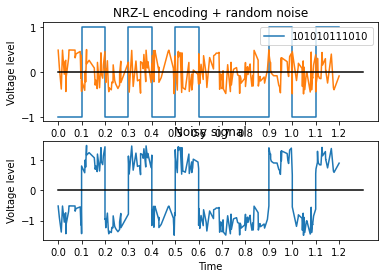

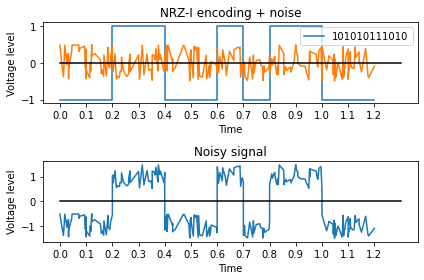

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random


bit_data=input("Enter the bit sequence")
vol_pos=float(input("Enter the maximum positive voltage of noise"))
vol_neg=float(input("Enter the minimum negative voltage of noise"))
#we are creating two different plots for two graphs
fig1,(ax1,ax3)=plt.subplots(nrows=2,ncols=1)
fig2,(ax2,ax4)=plt.subplots(nrows=2,ncols=1)
x=[]
nrzl=[]
nrzi=[]
x_val=0

#we are generating values for nrzl and nrzi
for it in range(len(bit_data)):
    if int(bit_data[it])==0:
        if len(nrzi) == 0:
            val=1
        else:
            val=nrzi[-1]
        for _ in range(18):
            x+=[round(random.uniform(x_val,x_val+0.1),4)]
            nrzl+=[1]
            nrzi+=[val]
        x+=[x_val,x_val+0.1]
        nrzl+=[1,1]
        nrzi+=[val,val]
        x_val+=0.1
    else:
        if len(nrzi)==0:
            val=-1
        else:
            val=-nrzi[-1]
        for _ in range(18):
            x += [round(random.uniform(x_val, x_val + 0.1),4)]
            nrzl += [-1]
            nrzi+=[val]
        x+=[x_val,x_val+0.1]
        nrzl+=[-1,-1]
        nrzi+=[val,val]
        x_val+=0.1
x.sort()
nrzl_with_noise=[]
nrzi_with_noise=[]
rand_noise=[]
#Now we will create random noise signal
for j in range(len(x)):
    rand_noise+=[round(random.uniform(vol_neg,vol_pos),4)]
    nrzl_with_noise+=[rand_noise[j]+nrzl[j]]
    nrzi_with_noise+=[rand_noise[j]+nrzi[j]]
#this list is made up of values which will be plotted on x-axis
val_to_be_pl=[0]
x_val=0.1
for _ in range(len(bit_data)):
     val_to_be_pl+=[x_val]
     x_val+=0.1

#fig1 will consists of ax1,ax3
#ax1 will plot nrzl+noise
#ax3 will plot the resultant nrzl due to noise i.e noisy signal
ax1.plot(x,nrzl,label=bit_data)
ax1.plot(x,rand_noise)
ax1.set_title("NRZ-L encoding + random noise")
ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage level")
ax1.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax1.set_xticks(val_to_be_pl)
ax1.legend()

ax3.plot(x,nrzl_with_noise)
ax3.set_title("Noisy signal")
ax3.set_xlabel("Time")
ax3.set_ylabel("Voltage level")
ax3.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax3.set_xticks(val_to_be_pl)

#fig2 will consists of ax2,ax4
#ax2 will plot nrzi+noise
#ax4 will plot the resultant nrzi due to noise i.e noisy signal
ax2.plot(x,nrzi,label=bit_data)
ax2.plot(x,rand_noise)
ax2.set_title("NRZ-I encoding + noise")
ax2.set_xlabel("Time")
ax2.set_ylabel("Voltage level")
ax2.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax2.set_xticks(val_to_be_pl)
ax2.legend()

ax4.plot(x,nrzi_with_noise)
ax4.set_title("Noisy signal")
ax4.set_xlabel("Time")
ax4.set_ylabel("Voltage level")
ax4.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax4.set_xticks(val_to_be_pl)

plt.tight_layout()
plt.show()


### A-3: Decide threshold for detection of bit sequence back and calculate number of bits in error

Enter the bit sequence10101011101
Enter the maximum positive voltage of noise0.5
Enter the minimum negative voltage of noise-0.5
Enter the positive threshold amplitude0.5
Enter the negative threshold amplitude-0.5
No. of bits which we were in ambiguous to indentify in NRZ-L= 1
No.of bits error in NRZ-L =  2
No.of bits error in NRZ-I =  3


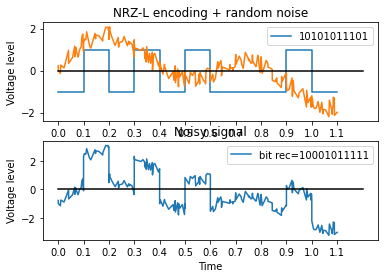

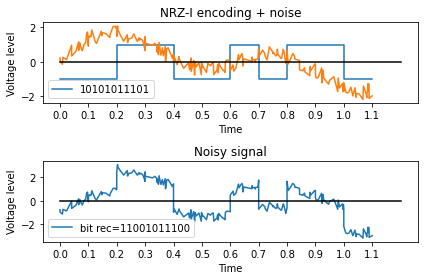

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math


bit_data=input("Enter the bit sequence")
vol_pos=float(input("Enter the maximum positive voltage of noise"))
vol_neg=float(input("Enter the minimum negative voltage of noise"))
#we are creating two different plots for two graphs
fig1,(ax1,ax3)=plt.subplots(nrows=2,ncols=1)
fig2,(ax2,ax4)=plt.subplots(nrows=2,ncols=1)
x=[]
nrzl=[]
nrzi=[]
x_val=0

#we are generating values for nrzl and nrzi
#for each bit we are taking 10 samples
#i.e 20 values are plotted between each 0.1 interval
for it in range(len(bit_data)):
    if int(bit_data[it])==0:
        if len(nrzi) == 0:
            val=1
        else:
            val=nrzi[-1]
        for _ in range(18):
            x+=[round(random.uniform(x_val,x_val+0.1),4)]
            nrzl+=[1]
            nrzi+=[val]
        x+=[x_val,x_val+0.1]
        nrzl+=[1,1]
        nrzi+=[val,val]
        x_val+=0.1
    else:
        if len(nrzi)==0:
            val=-1
        else:
            val=-nrzi[-1]
        for _ in range(18):
            x += [round(random.uniform(x_val, x_val + 0.1),4)]
            nrzl += [-1]
            nrzi+=[val]
        x+=[x_val,x_val+0.1]
        nrzl+=[-1,-1]
        nrzi+=[val,val]
        x_val+=0.1
x.sort()
nrzl_with_noise=[]
nrzi_with_noise=[]
rand_noise=[]
#Now we will create random noise signal
for j in range(len(x)):
    rand_noise+=[math.sin(10*x[j])+math.sin(5*x[j])]
    rand_noise[j]+=random.uniform(vol_neg,vol_pos)
    nrzl_with_noise+=[rand_noise[j]+nrzl[j]]
    nrzi_with_noise+=[rand_noise[j]+nrzi[j]]

threshold_pos=float(input("Enter the positive threshold amplitude"))
threshold_neg=float(input("Enter the negative threshold amplitude"))
#now will calculate the bit sequence received
bit_seq_in_nrzi=""
bit_seq_in_nrzl=""
ambg_in_nrzl=0
#it is just any number, to calculate nrzi
prev_mean=100
i=0
while i<len(nrzl):
    mean1=(sum(nrzl_with_noise[i:i+20]))/10
    mean2=(sum(nrzi_with_noise[i:i+20]))/10
    if mean1>=threshold_pos:
        bit_seq_in_nrzl+="0"
    elif mean1<=threshold_neg:
        bit_seq_in_nrzl += "1"
    else:#if it does not fall in any limit then
         #we will consider the bit as 1 and we we
         #can have count of such bits
        bit_seq_in_nrzl+="1"
        ambg_in_nrzl+=1
    if prev_mean==100:
       if mean2>=threshold_pos:
           bit_seq_in_nrzi+="0"
       else:
           bit_seq_in_nrzi+="1"
    else:
        if abs(prev_mean+mean2)>abs(mean2) and abs(prev_mean+mean2)>abs(mean1):#if they have same sign
            bit_seq_in_nrzi += "0"
        else:#therefore they have opp sign
            bit_seq_in_nrzi += "1"
    prev_mean = mean2
    i+=20

bit_err_in_nrzi=0
bit_err_in_nrzl=0
for j in range(len(bit_data)):
    if int(bit_data[j])!=int(bit_seq_in_nrzi[j]):
        bit_err_in_nrzi+=1
    if int(bit_data[j])!=int(bit_seq_in_nrzl[j]):
        bit_err_in_nrzl+=1
print("No. of bits which we were in ambiguous to indentify in NRZ-L=",ambg_in_nrzl)
print("No.of bits error in NRZ-L = ",bit_err_in_nrzl)
print("No.of bits error in NRZ-I = ",bit_err_in_nrzi)
#this list is made up of values which will be plotted on x-axis
val_to_be_pl=[0]
x_val=0.1
for _ in range(len(bit_data)):
     val_to_be_pl+=[x_val]
     x_val+=0.1


#fig1 will consists of ax2,ax4
#ax1 will plot nrzl+noise
#ax3 will plot the resultant nrzl due to noise i.e noisy signal
ax1.plot(x,nrzl,label=bit_data)
ax1.plot(x,rand_noise)
ax1.set_title("NRZ-L encoding + random noise")
ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage level")
ax1.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax1.set_xticks(val_to_be_pl)
ax1.legend()

ax3.plot(x,nrzl_with_noise,label="bit rec={}".format(bit_seq_in_nrzl))
ax3.set_title("Noisy signal")
ax3.set_xlabel("Time")
ax3.set_ylabel("Voltage level")
ax3.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax3.set_xticks(val_to_be_pl)
ax3.legend()

#fig2 will consists of ax2,ax4
#ax2 will plot nrzi+noise
#ax4 will plot the resultant nrzi due to noise i.e noisy signal
ax2.plot(x,nrzi,label=bit_data)
ax2.plot(x,rand_noise)
ax2.set_title("NRZ-I encoding + noise")
ax2.set_xlabel("Time")
ax2.set_ylabel("Voltage level")
ax2.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax2.set_xticks(val_to_be_pl)
ax2.legend()

ax4.plot(x,nrzi_with_noise,label="bit rec={}".format(bit_seq_in_nrzi))
ax4.set_title("Noisy signal")
ax4.set_xlabel("Time")
ax4.set_ylabel("Voltage level")
ax4.plot((0,(len(bit_data)+1)*0.1),(0,0),color='k')
ax4.set_xticks(val_to_be_pl)
ax4.legend()

plt.tight_layout()
plt.show()

